In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = {
    "id": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
    "name": ["Alice", "Bob", "Charlie", "Diana", "Ethan", "Fiona", "George", "Hannah", "Ian", "Julia", "Kevin", "Laura", "Michael", "Nina", "Oscar"],
    "study_hours": [15, 7, 10, 12, 5, 14, 9, 11, 6, 13, 8, 16, 4, 7, 12],
    "attendance": [90, 75, 80, 85, 60, 92, 78, 83, 65, 88, 70, 95, 55, 72, 86], # %
    "extracurricular": ["Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes"],
    "hw_score": [85, 70, 78, 88, 60, 90, 75, 82, 65, 86, 72, 95, 58, 68, 89], # out of 100
    "final_exam_score": [92, 68, 74, 89, 55, 95, 72, 80, 60, 90, 70, 97, 52, 65, 88] # target 
}
df = pd.DataFrame(data)
df.head(10)


,id,name,study_hours,attendance,extracurricular,hw_score,final_exam_score
0,101,Alice,15,90,Yes,85,92
1,102,Bob,7,75,No,70,68
2,103,Charlie,10,80,Yes,78,74
3,104,Diana,12,85,No,88,89
4,105,Ethan,5,60,Yes,60,55
5,106,Fiona,14,92,Yes,90,95
6,107,George,9,78,No,75,72
7,108,Hannah,11,83,Yes,82,80
8,109,Ian,6,65,No,65,60
9,110,Julia,13,88,No,86,90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                15 non-null     int64 
 1   name              15 non-null     object
 2   study_hours       15 non-null     int64 
 3   attendance        15 non-null     int64 
 4   extracurricular   15 non-null     object
 5   hw_score          15 non-null     int64 
 6   final_exam_score  15 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 972.0+ bytes


In [5]:
# Drop irrelevant columns
df = df.drop(["id", "name"], axis=1)

# We'll map 'Yes' to 1 and 'No' to 0
df['extracurricular'] = df['extracurricular'].map({'Yes': 1, 'No': 0})

In [6]:
df.head()

,study_hours,attendance,extracurricular,hw_score,final_exam_score
0,15,90,1,85,92
1,7,75,0,70,68
2,10,80,1,78,74
3,12,85,0,88,89
4,5,60,1,60,55


In [7]:
# Define features (X) and target (y)
X = df.drop("final_exam_score", axis=1)
y = df["final_exam_score"]
y.head()

0    92
1    68
2    74
3    89
4    55
Name: final_exam_score, dtype: int64

                  study_hours  attendance  extracurricular  hw_score  \
study_hours          1.000000    0.970743         0.427527  0.967112   
attendance           0.970743    1.000000         0.345559  0.972713   
extracurricular      0.427527    0.345559         1.000000  0.379617   
hw_score             0.967112    0.972713         0.379617  1.000000   
final_exam_score     0.984406    0.977529         0.365371  0.986636   

                  final_exam_score  
study_hours               0.984406  
attendance                0.977529  
extracurricular           0.365371  
hw_score                  0.986636  
final_exam_score          1.000000  


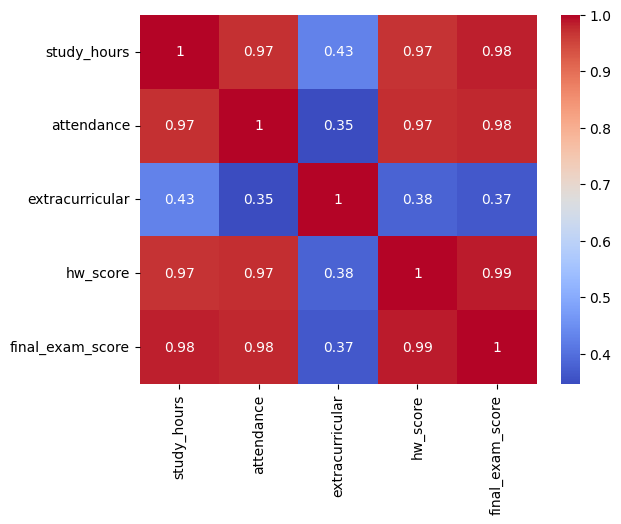

In [ ]:
print(df.corr())
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [9]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random_state=42 ensures that we get the same split every time we run the code.

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 12 samples
Testing set size: 3 samples


In [10]:
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Display the predictions alongside the actual scores
predictions_df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})
print("\nPredictions vs. Actual Scores:")
print(predictions_df)


Predictions vs. Actual Scores:
    Actual Score  Predicted Score
9             90        89.325879
11            97       100.511364
0             92        91.750664


In [12]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print(f"The MAE of {mae:.2f} means that, on average, our model's predictions are about {mae:.2f} points away from the actual final exam score.")
print(f"An R-squared score of {r2:.2f} means that our model explains approximately {r2*100:.0f}% of the variance in the final exam scores.")

The MAE of 1.48 means that, on average, our model's predictions are about 1.48 points away from the actual final exam score.
An R-squared score of 0.51 means that our model explains approximately 51% of the variance in the final exam scores.


In [14]:
new_student_data = pd.DataFrame({
    'study_hours': [12],
    'attendance': [95],
    'extracurricular': [0],
    'hw_score': [90]
})

# Predict the final exam score for the new student
predicted_score = model.predict(new_student_data)

print(f"\nPredicted final exam score for the new student: {predicted_score[0]:.2f} 📝")


Predicted final exam score for the new student: 89.70 📝
